In [7]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from cnp.experiment import WorkingDirectory, generate_root
import os
import matplotlib.pyplot as plt
import matplotlib


In [29]:
def plot_results(d, df, zoom=False):
    plt.xticks([])
    x = np.arange(len(df[d]) - 2)
    ones = np.ones_like(x)
    y = df[d]
    e = df[d + '-error']
    label = df.index
    colour = df['colour'].tolist()
    marker = df['marker'].tolist()
    

    oracle_mean = df.at['oracle', d]  
    oracle_error = df.at['oracle', d + '-error' ]
    oracle_diag_mean = df.at['oracle-diag', d] 
    oracle_diag_error = df.at['oracle-diag', d + '-error'] 

    print(oracle_diag_error)
        
    for i in range(0, len(x)):
        if y[i] is not np.NaN:
           plt.errorbar(x[i], y[i], e[i], marker=marker[i], color=colour[i], label=label[i])

    plt.plot(x, oracle_diag_mean * ones, label='Oracle-GP-Diagonal', color='k')
    plt.fill_between(x,
                     (oracle_diag_mean + oracle_diag_error) * ones,
                     (oracle_diag_mean - oracle_diag_error) * ones,
                     color='k', alpha=0.1)
    plt.plot(x, oracle_mean * ones, label='Oracle-GP', color='k')
    plt.fill_between(x,
                     (oracle_mean + oracle_error) * ones,
                     (oracle_mean - oracle_error) * ones,
                     color='k', alpha=0.1)

    plt.legend( ncol=2 ,bbox_to_anchor=(1, 0))
    
    y_min = np.min(y)
    y_max = np.max(y)
    epsilon = 0.0005 * (y_max - y_min)

    if zoom:
        plt.ylim(y_min - epsilon, y_max + epsilon)
    plt.title(d)
    plt.show()

In [33]:
# data types
# d = 'eq'
# d = 'matern'
# d = 'noisy-mixture'
d = 'weakly-periodic'

# sumkvv plots
# path = d + "-sumkvv.pkl"

# innerprod plots
path = d + "-innerprod.pkl"


df = pd.read_pickle(path)
df

0.019115273610683572


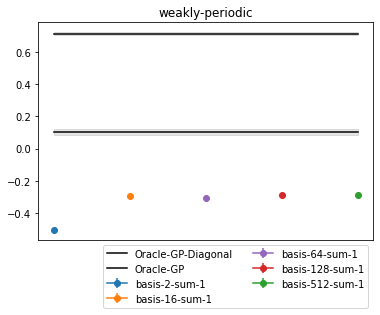

0.019115273610683572


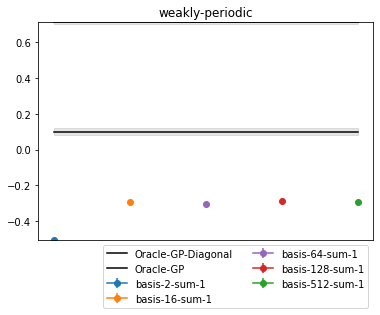

In [32]:
plot_results(d, df)
plot_results(d, df, zoom=True)